##Importing Necessary Libraries

In [175]:
import numpy as np
import pandas as pd

# Loading dataset

In [176]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

##Seperating Input and Output Values

In [177]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

# Train test split

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)

##Normalizing the Dataset

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)

# Perceptron Class

$y = 1, \mbox{if} \sum_i w_i x_i + b >= 0$

$y =  0, \mbox{otherwise}$

where w is the weights , x in the input feature and b is the bias

In [180]:
class Perceptron:
  def __init__(self,lr = 0.001,n_iterations=1000):
    self.lr = lr
    self.epochs = n_iterations
    self.weights = None
    self.bias = None
  
  def fit(self,X,y):

    self.weights = np.array([1,1])
    self.bias = 0

    for epoch in range(self.epochs):
      for i in range(X.shape[0]):
        y_pred = self.activation_function(np.dot(self.weights,X[i]) + self.bias)

        #update values of weights and bias
        self.weights = self.weights + self.lr * (y[i] - y_pred) * X[i]
        self.bias = self.bias + self.lr * (y[i] - y_pred)
    
    print("Training Complete")
    print(self.weights)
    print(self.bias)
  
  #activation fucntion(sigmoid)
  def activation_function(self,activation):
    if activation >= 0:
      return 1
    else:
      return 0
  
  def predict(self,X):
    y_pred = []
    for i in range(X.shape[0]):
      y_pred.append(self.activation_function(np.dot(self.weights,X[i]) + self.bias))
    return np.array(y_pred)

###Here is a pictorial representation of a Perceptron Model

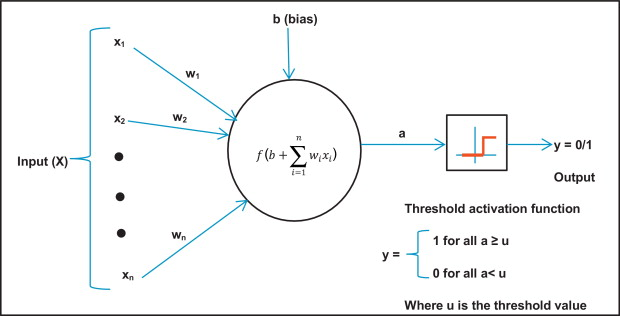

In [181]:
perceptron = Perceptron()

In [182]:
perceptron.fit(x_train, y_train)

Training Complete
[0.00557143 0.00315556]
-0.003999999999999896


In [183]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = perceptron.predict(x_test)
print(f'Accuracy of this Model is {accuracy_score(y_pred,y_test)}')

Accuracy of this Model is 0.85


In [184]:
confusion_matrix(y_pred, y_test)

array([[45,  2],
       [13, 40]])

##Fine Tuning Perceptron Model
The Perceptron Model depends on 4 features namely:
1. Learning Rate
2. Number of Iterations
3. Weights
4. Bias

By Changing the values of these 4 features we can change the accuracy of our model to a great extent.
